# Nonlinear Regression

## Neural Networks

The following packages can be used to create neural networks:
1. nnet
2. neural
3. RSNNS

The `nnet` function takes both the formular and non-formular interfaces.

The linear relationships between the hidden units and the prediction can be used with the option `linout = TRUE`

The following creates a model with 5 hidden units

```R
library(nnet)
nnetFit <- nnet(predictors, outcome,
               size = 5, 
               linout = TRUE,
               ## Reduce the amount of printed output
               trace = FALSE,
               ## Expand the number of iterations to find parameter estimates...
               maxit = 500,
               ## and the number of parameters used by the model
               MaxNWts = 5*(ncol(predictors) + 1) + 5 + 1)
```

To use averaging `avNNet` function from the caret library could be used 

```R
avNNet(predictor, outcome,
    size = 5,
    decay = 0.01,
    ## Specify how many models to average
    repeats = 5,
    linout = TRUE,
    ## Reduce the amount of printed output
    trace = FALSE,
    maxit = 500,
    MaxNWts = 5*(ncol(predictors) + 1) + 5 + 1)

```
New samples are processed using

```R

predict(nnetFit, newData)

# or

predict(nnetAvg, newData)

```


The `train` function could be used to mimic eaither approach of choosing the number of hidden units and the amount of weight decay via resampling by using either `method = "nnet"` or `method = "avNNet"

### Load Data

In [1]:
### Load the data

library(AppliedPredictiveModeling)
data(solubility)

### Create a control funciton that will be used across models. We
### create the fold assignments explictily instead of relying on the
### random number seed being set to identical values.

library(caret)
set.seed(100)
indx <- createFolds(solTrainY, returnTrain = TRUE)
ctrl <- trainControl(method = "cv", index = indx)

Loading required package: lattice
Loading required package: ggplot2


In [ ]:
### Section 7.1 Neural Networks

### Optional: parallel processing can be used via the 'do' packages,
### such as doMC, doMPI etc. We used doMC (not on Windows) to speed
### up the computations.

### WARNING: Be aware of how much memory is needed to parallel
### process. It can very quickly overwhelm the availible hardware. We
### estimate the memory usuage (VSIZE = total memory size) to be 
### 2677M/core.

library(doMC)
registerDoMC(2)


library(caret)

nnetGrid <- expand.grid(decay = c(0, 0.01, .1), 
                        size = c(1, 3, 5, 7, 9, 11, 13), 
                        bag = FALSE)

set.seed(100)
nnetTune <- train(x = solTrainXtrans, y = solTrainY,
                  method = "avNNet",
                  tuneGrid = nnetGrid,
                  trControl = ctrl,
                  preProc = c("center", "scale"),
                  linout = TRUE,
                  trace = FALSE,
                  MaxNWts = 13 * (ncol(solTrainXtrans) + 1) + 13 + 1,
                  maxit = 1000,
                  allowParallel = FALSE)
nnetTune

plot(nnetTune)

testResults <- data.frame(obs = solTestY,
                          NNet = predict(nnetTune, solTestXtrans))

Loading required package: nnet


## Multivariate Adaptive Regression Splines

The most extensive package for `MARS` models is `earth`. Models using nominal forward pass and pruning step can be called using:

In [4]:
library(earth)
marsFit <- earth(solTrainXtrans, solTrainY)

marsFit

Selected 40 of 47 terms, and 31 of 228 predictors
Termination condition: RSq changed by less than 0.001 at 47 terms
Importance: NumNonHAtoms, SurfaceArea2, MolWeight, SurfaceArea1, FP142, ...
Number of terms at each degree of interaction: 1 39 (additive model)
GCV 0.3873018    RSS 309.672    GRSq 0.9076346    RSq 0.9221793

Output for GCV technique is a bit different than other models. `summary` generates more extensive output:

In [5]:
summary(marsFit)

Call: earth(x=solTrainXtrans, y=solTrainY)

                                coefficients
(Intercept)                        -4.455949
FP002                               0.733904
FP003                              -0.203502
FP059                              -0.613495
FP065                              -0.278610
FP075                               0.295269
FP083                              -0.563202
FP085                              -0.193880
FP099                               0.337591
FP111                              -0.428246
FP135                               0.405277
FP142                               0.397119
FP154                              -0.597650
FP172                              -0.527362
FP176                               0.294774
FP188                               0.407757
FP202                               0.279390
FP204                              -0.336720
FP207                               0.424005
h(MolWeight-5.77157)               -1.964915
h(5.94458-M

In the output `h(.)` represents the hinge function.

The `plotmo` function is used to produce plots for

 plotmo grid:    FP001 FP002 FP003 FP004 FP005 FP006 FP007 FP008 FP009 FP010
                     0     1     0     1     1     0     0     0     0     0
 FP011 FP012 FP013 FP014 FP015 FP016 FP017 FP018 FP019 FP020 FP021 FP022 FP023
     0     0     0     0     1     0     0     0     0     0     0     0     0
 FP024 FP025 FP026 FP027 FP028 FP029 FP030 FP031 FP032 FP033 FP034 FP035 FP036
     0     0     0     0     0     0     0     0     0     0     0     0     0
 FP037 FP038 FP039 FP040 FP041 FP042 FP043 FP044 FP045 FP046 FP047 FP048 FP049
     0     0     0     0     0     0     0     0     0     0     0     0     0
 FP050 FP051 FP052 FP053 FP054 FP055 FP056 FP057 FP058 FP059 FP060 FP061 FP062
     0     0     0     0     0     0     0     0     0     0     0     0     0
 FP063 FP064 FP065 FP066 FP067 FP068 FP069 FP070 FP071 FP072 FP073 FP074 FP075
     0     0     1     1     0     0     0     0     0     1     0     0     0
 FP076 FP077 FP078 FP079 FP080 FP081 FP082 FP083 FP084 F

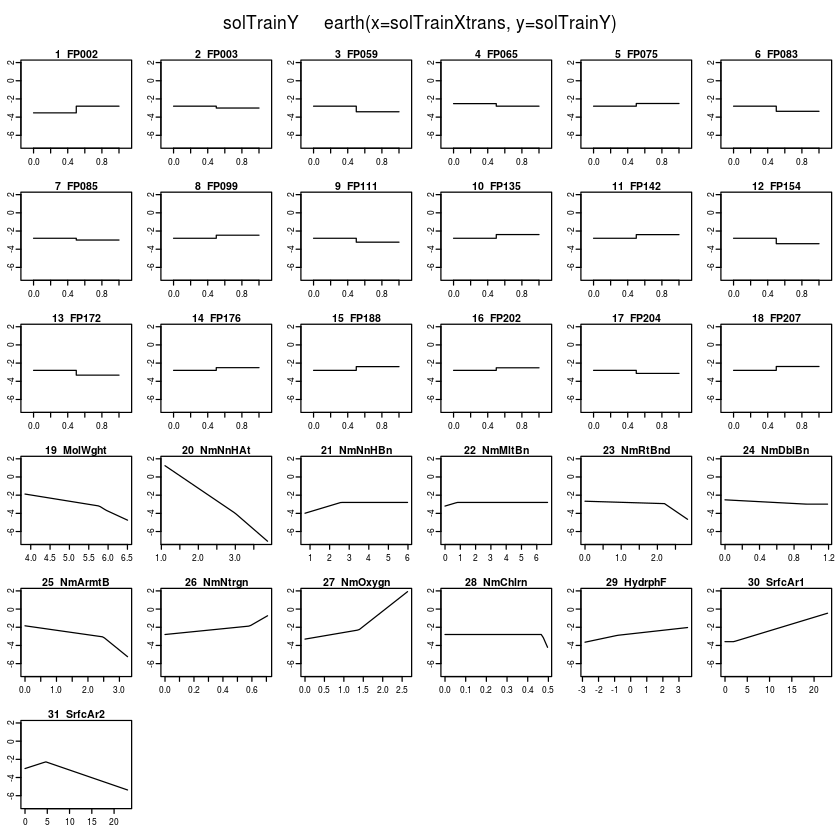

In [6]:
plotmo(marsFit)

Loading required package: earth
Loading required package: plotmo
Loading required package: plotrix
Loading required package: TeachingDemos


Multivariate Adaptive Regression Spline 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results across tuning parameters:

  nprune  RMSE       Rsquared 
   2      1.5394929  0.4378008
   3      1.1074457  0.7054362
   4      1.0304862  0.7448097
   5      0.9635293  0.7771835
   6      0.9249247  0.7955089
   7      0.8906930  0.8104281
   8      0.8716609  0.8205519
   9      0.8711677  0.8184618
  10      0.8526796  0.8259401
  11      0.8319216  0.8348660
  12      0.8247850  0.8385082
  13      0.8067998  0.8456304
  14      0.7912380  0.8516889
  15      0.7876492  0.8524023
  16      0.7624944  0.8611658
  17      0.7626166  0.8615417
  18      0.7541541  0.8633410
  19      0.7496361  0.8646713
  20      0.7452180  0.8661133
  21      0.7375202  0.8690318
  22      0.7352059  0.8699644
  23      0.7334775  0.8708583
  24      0.7297214  0.8716708
  25      0.7228322  0.

ERROR: Error in testResults$MARS <- predict(marsTune, solTestXtrans): object 'testResults' not found


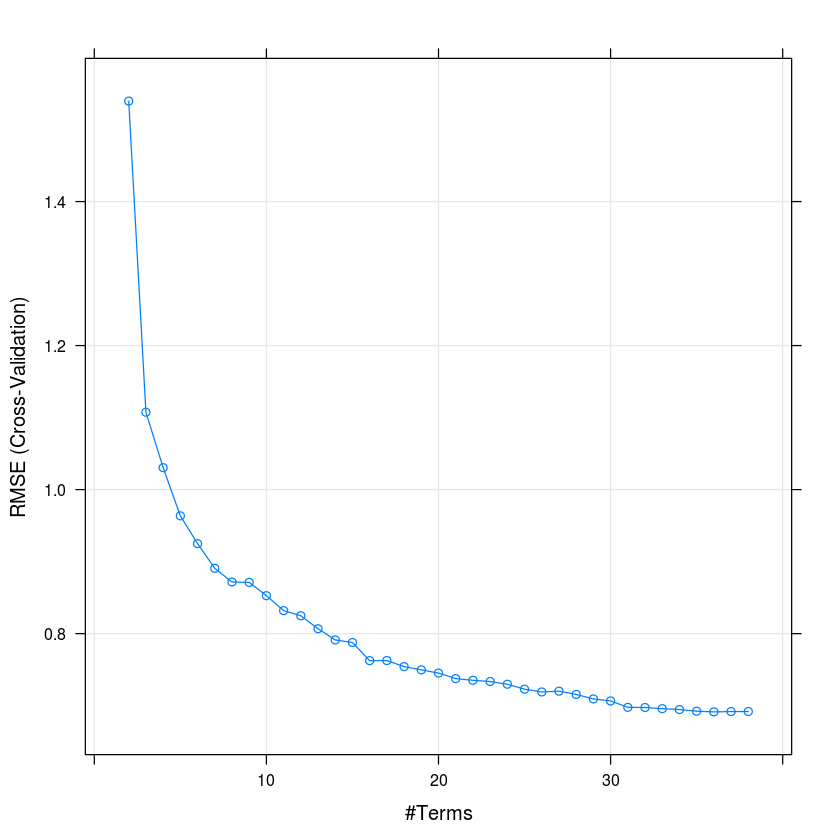

In [2]:
set.seed(100)
marsTune <- train(x = solTrainXtrans, y = solTrainY,
                  method = "earth",
                  tuneGrid = expand.grid(degree = 1, nprune = 2:38),
                  trControl = ctrl)
marsTune

plot(marsTune)

testResults$MARS <- predict(marsTune, solTestXtrans)

marsImp <- varImp(marsTune, scale = FALSE)
plot(marsImp, top = 25)

## Support Vector Machine

`svm` function in e1071 package has an interface to `LIBSVM` library for regression. `kernlab` has a more comprehensive package for `SVM` models.`ksvm` is the function for regression models in the `kernlab` package. By default it uses the radial basis kernel function.

In [13]:
library(caret)
svmFit <- ksvm(x = as.matrix(solTrainXtrans), y = solTrainY,
              kernel = "rbfdot", kpar = "automatic",
              C = 1, epsilon = 0.1)
svmFit

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.00266504908846057 

Number of Support Vectors : 668 

Objective Function Value : -126.8155 
Training error : 0.042586 

ERROR: Error in .local(x, ...): Only plots of classification ksvm objects supported


The following kernels could be used: `polydot`,`vanilladot`

If values are unknown they can be estimated through resampling. In train, the method values of `"svmRadial"`, `"svmLinear"`, or `"svmPoly"` fit different kernels.


In [14]:
svmRTuned <- train(solTrainXtrans, solTrainY,
                  method = "svmRadial",
                  preProc = c("center","scale"),
                  tuneLenth = 14,
                  trControl = trainControl( method = "cv"))

`tuneLenth` argument will use the default grid search of 14 cost values between `2^-2, 2^-1,...,2^11`

In [15]:
svmRTuned

Support Vector Machines with Radial Basis Function Kernel 

951 samples
228 predictors

Pre-processing: centered (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 857, 857, 855, 855, 856, ... 
Resampling results across tuning parameters:

  C     RMSE       Rsquared 
  0.25  0.8006550  0.8667664
  0.50  0.7101878  0.8877691
  1.00  0.6640330  0.8981843

Tuning parameter 'sigma' was held constant at a value of 0.002728227
RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were sigma = 0.002728227 and C = 1. 

The model created by ksvm is contained in the `finalModel` subobject

In [16]:
svmRTuned$finalModel

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.00272822721030723 

Number of Support Vectors : 669 

Objective Function Value : -125.7171 
Training error : 0.041866 

`kernlab` has implementation of the RSVM model for regression in the function `rvm`

Support Vector Machines with Radial Basis Function Kernel 

951 samples
228 predictors

Pre-processing: centered (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results across tuning parameters:

  C        RMSE       Rsquared 
     0.25  0.8044585  0.8650782
     0.50  0.7101179  0.8873434
     1.00  0.6602731  0.8992637
     2.00  0.6302407  0.9062848
     4.00  0.6200748  0.9084686
     8.00  0.6081620  0.9116739
    16.00  0.6034937  0.9130565
    32.00  0.6022763  0.9133471
    64.00  0.6025284  0.9133351
   128.00  0.6008796  0.9141644
   256.00  0.6015656  0.9140869
   512.00  0.6043280  0.9132181
  1024.00  0.6058380  0.9126016
  2048.00  0.6073675  0.9119596

Tuning parameter 'sigma' was held constant at a value of 0.002762998
RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were sigma = 0.002762998 and C = 128. 

Support Vector Machines with Polynomial Kernel 

951 samples
228 predictors

Pre-processing: centered (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results across tuning parameters:

  degree  scale  C      RMSE       Rsquared 
  1       0.001   0.25  1.0503680  0.7964309
  1       0.001   0.50  0.8947545  0.8356804
  1       0.001   1.00  0.7964274  0.8583793
  1       0.001   2.00  0.7363246  0.8742098
  1       0.001   4.00  0.7054759  0.8825715
  1       0.001   8.00  0.6935336  0.8856715
  1       0.001  16.00  0.6929002  0.8856847
  1       0.001  32.00  0.6960232  0.8846537
  1       0.005   0.25  0.7735064  0.8643633
  1       0.005   0.50  0.7215802  0.8785463
  1       0.005   1.00  0.6989746  0.8844254
  1       0.005   2.00  0.6904587  0.8865083
  1       0.005   4.00  0.6946476  0.8852088
  1       0.005   8.00  0.7013268  0.8828532
  1       0.005  16.00  0.7186163  0.8775219
  1       0.

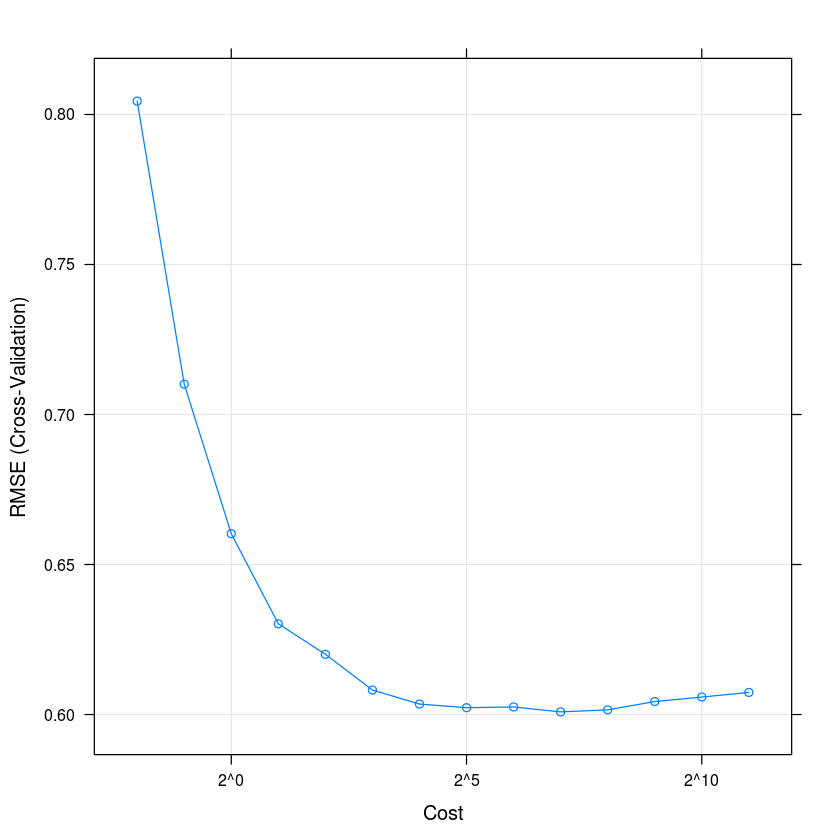

ERROR: Error in testResults$SVMr <- predict(svmRTune, solTestXtrans): object 'testResults' not found


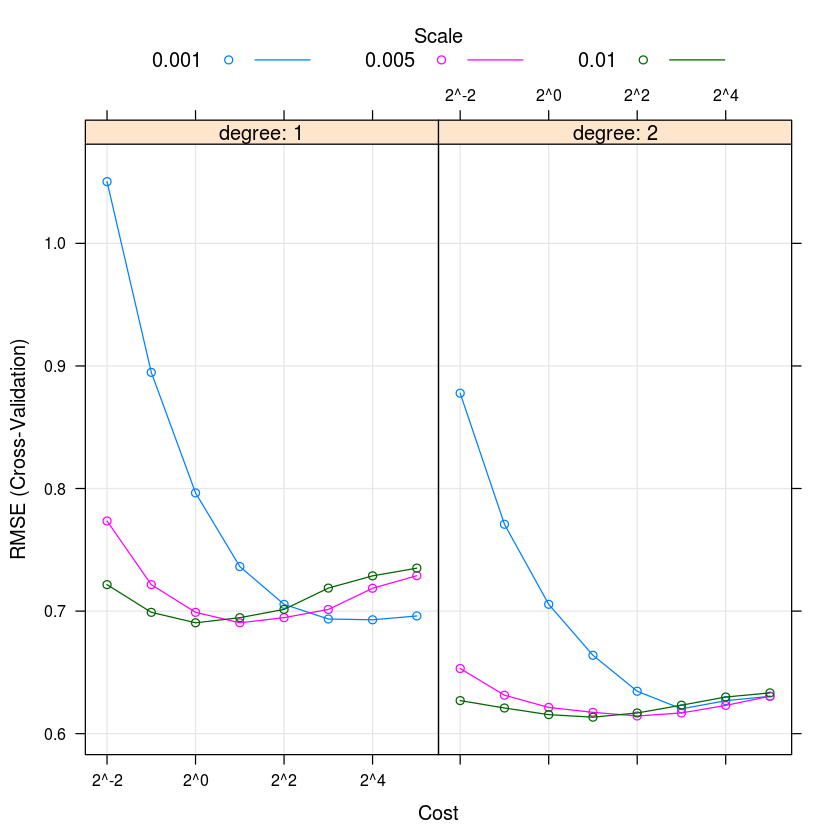

In [17]:
set.seed(100)
svmRTune <- train(x = solTrainXtrans, y = solTrainY,
                  method = "svmRadial",
                  preProc = c("center", "scale"),
                  tuneLength = 14,
                  trControl = ctrl)
svmRTune
plot(svmRTune, scales = list(x = list(log = 2)))                 

svmGrid <- expand.grid(degree = 1:2, 
                       scale = c(0.01, 0.005, 0.001), 
                       C = 2^(-2:5))
set.seed(100)
svmPTune <- train(x = solTrainXtrans, y = solTrainY,
                  method = "svmPoly",
                  preProc = c("center", "scale"),
                  tuneGrid = svmGrid,
                  trControl = ctrl)

svmPTune
plot(svmPTune, 
     scales = list(x = list(log = 2), 
                   between = list(x = .5, y = 1)))                 

testResults$SVMr <- predict(svmRTune, solTestXtrans)
testResults$SVMp <- predict(svmPTune, solTestXtrans)

## K-Nearest Neighbors

The `caret` package contains the `knnreg` function that fits the KNN regression model.

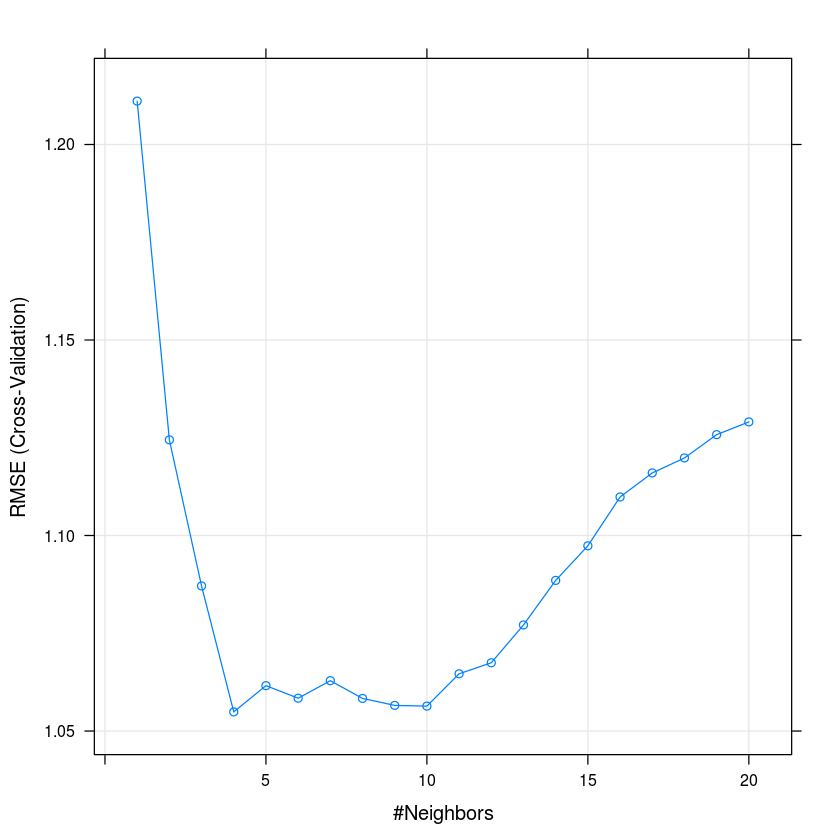

In [20]:
# Remove a few sparse and unbalanced fingerprints first
knnDescr <- solTrainXtrans[,-nearZeroVar(solTrainXtrans)]
set.seed(100)
knnTune <- train(knnDescr,
                solTrainY,
                method = "knn",
                preProc = c("center", "scale"),
                tuneGrid = data.frame(k = 1:20),
                trControl = trainControl(method = "cv"))
plot(knnTune)